In [2]:
# Import all libraries and dependencies
import pandas as pd
import os
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
import matplotlib.figure as figure
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


### This section is to set defualt options for pandas and other libraries

In [3]:
# Set default options for pandas and other libraries
pd.set_option('display.max_colwidth', None)

In [4]:
# Define the column names
# column_names = [
#     'Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 
#     'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
#     'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth',
#     'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP','Diabetes'
# ]
# Import Excel files
behavioural_raw_df = pd.read_csv("Resources/diabetes_data.csv").dropna()

In [5]:
behavioural_raw_df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
behavioural_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [7]:
behavioural_raw_df.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [8]:
behavioural_raw_df.dropna()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


In [9]:
# Create the labels set `y` and features DataFrame `X`
# generate code for feature selection Model
# Get the features (everything except the "Diabetes" column)
X = behavioural_raw_df.copy().drop(columns="Diabetes")
X.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Get the target column
y = behavioural_raw_df["Diabetes"].values.ravel()
y[0:5]

array([0., 0., 0., 0., 0.])

In [11]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
# Create a Linear Regression model object and fit it to the training data 

import statsmodels.api as sm

lr = sm.OLS(y_train, X_train).fit() 

#

In [13]:
# Calculate the P-values for each feature using the model's summary
p_values = lr.pvalues.sort_values(ascending=False)
p_values

Smoker                   6.765061e-03
PhysHlth                 4.732092e-05
Stroke                   3.714012e-05
Sex                      2.112599e-06
MentHlth                 1.545170e-08
Fruits                   8.396864e-10
DiffWalk                 5.922805e-30
PhysActivity             1.772371e-30
HeartDiseaseorAttack     1.802944e-33
Veggies                  1.160523e-38
CholCheck                6.463853e-60
HvyAlcoholConsump        4.380106e-65
Age                     7.476530e-105
BMI                     2.490876e-141
HighChol                4.274810e-185
GenHlth                  0.000000e+00
HighBP                   0.000000e+00
dtype: float64

In [14]:
# Use loc to filter to columns with p-values below 0.05
select_cols = p_values.loc[p_values < 0.05]

# Show the index of the results
select_cols.index

Index(['Smoker', 'PhysHlth', 'Stroke', 'Sex', 'MentHlth', 'Fruits', 'DiffWalk',
       'PhysActivity', 'HeartDiseaseorAttack', 'Veggies', 'CholCheck',
       'HvyAlcoholConsump', 'Age', 'BMI', 'HighChol', 'GenHlth', 'HighBP'],
      dtype='object')

In [15]:
# Filter the features in X to include only the selected columns
X_full = X
X_sel = X[select_cols.index]

In [16]:
# split the data into training and testing sets for both the full and selected feature sets
X_full_train, X_full_test, X_sel_train, X_sel_test, y_train, y_test = train_test_split(X_full, X_sel, y)

In [17]:
# Create Linear Regression models for both the full and selected feature sets

from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr2 = LinearRegression()

# Fit the models
lr1.fit(X_full_train, y_train)
lr2.fit(X_sel_train, y_train)

LinearRegression()

In [18]:
# Provided code to create the adjusted r-squared function
def r2_adj(x, y, model):
    r2 = model.score(x,y)
    n_cols = x.shape[1]
    return 1 - (1 - r2) * (len(y) - 1) / (len(y) - n_cols - 1)

In [19]:
# Calculate the adjusted r-squared for the full and selected feature sets
# Compare the adjusted r-squared of the two models
adj_score1 = r2_adj(X_full_test, y_test, lr1)
adj_score2 = r2_adj(X_sel_test, y_test, lr2)
print(f"1 Feature Adjusted R2: {adj_score1}")
print(f"2 Feature Adjusted R2: {adj_score2}")

1 Feature Adjusted R2: 0.2976202182314409
2 Feature Adjusted R2: 0.29762021823144114


In [20]:
# Print the coefficients of the feature model and use Recursive Feature Elimination (RFE) to select the best 5 features

# Import the necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Initialize the model with increased max_iter
model = LogisticRegression(max_iter=1000)

# Initialize RFE with the model and the number of features to select
rfe = RFE(estimator=model, n_features_to_select=5)

# Fit RFE
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]
ranking = rfe.ranking_

print("Selected Features:", selected_features)
print("Feature Ranking:", ranking)

Selected Features: Index(['HighChol', 'CholCheck', 'HvyAlcoholConsump', 'GenHlth', 'HighBP'], dtype='object')
Feature Ranking: [ 6  4  1  1  8 11  2 10  9  5  1  1 13 12  3  7  1]


In [21]:



# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the resulting datasets
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)



x_train shape: (56553, 17)
x_test shape: (14139, 17)
y_train shape: (56553,)


#

Diabetes
0.0    35346
1.0    35346
Name: count, dtype: int64


<Axes: xlabel='Diabetes'>

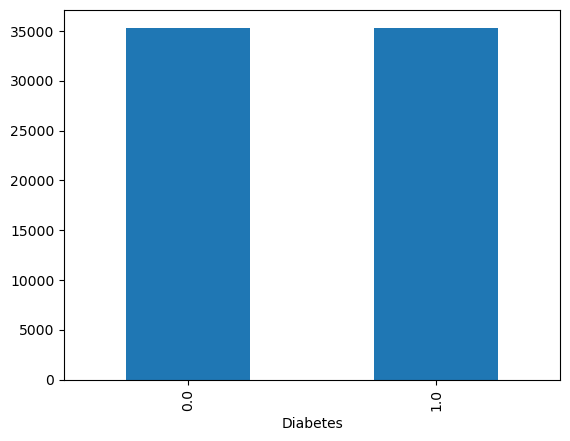

In [23]:
import pandas as pd



# Check the distribution of the target variable
class_distribution = behavioural_raw_df['Diabetes'].value_counts()
print(class_distribution)

# Plot the distribution (optional)
class_distribution.plot(kind='bar')

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


X_selected = X[selected_features]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7190041728552231
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.64      0.69      7070
         1.0       0.69      0.80      0.74      7069

    accuracy                           0.72     14139
   macro avg       0.72      0.72      0.72     14139
weighted avg       0.72      0.72      0.72     14139



In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7232477544380791
Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.69      0.71      7070
         1.0       0.71      0.76      0.73      7069

    accuracy                           0.72     14139
   macro avg       0.72      0.72      0.72     14139
weighted avg       0.72      0.72      0.72     14139

